# Multicollinearity

## Introduction
**Multicollinearity** occurs when one or more predictor variables in a multiple regression model are highly correlated. This can significantly affect the accuracy of the coefficient estimates within the model.

## Mathematical Explanation

Consider the linear regression model:
$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_kX_k + \epsilon $


where:
- $Y$ is the dependent variable
- $X_1, X_2, \ldots, X_k$ are the independent variables
- $\epsilon$ is the error term.

### Normal Equation
The coefficients $\beta$ are estimated using the equation:
$ \beta = (\mathbf{X}´\mathbf{X})^{-1}\mathbf{X}´\mathbf{Y} $

To find $\beta$, the matrix $\mathbf{X}´\mathbf{X}$ must be invertible. However, multicollinearity can make this matrix nearly singular or singular.


### Why $\mathbf{X}´\mathbf{X}$ Becomes Non-invertible
- **Singular Matrix**: If $\mathbf{X}´\mathbf{X}$ is singular, it implies that its determinant is zero due to perfect or high multicollinearity.
- **Linear Dependence**: This happens when one or more independent variables are linear combinations of others.


Matrix Representation

Assume $X_2 = cX_1$, then:
$ \mathbf{X} = \begin{bmatrix} 1 & X_1 & X_2 \\ 1 & X_1 & cX_1 \\ \vdots & \vdots & \vdots \\ 1 & X_1 & cX_1 \end{bmatrix} $


### Covariance Matrix ($\mathbf{X}´\mathbf{X}$)
$ \mathbf{X}´\mathbf{X} = \begin{bmatrix} n & \sum X_1 & c\sum X_1 \\ \sum X_1 & \sum X_1^2 & c\sum X_1^2 \\ c\sum X_1 & c\sum X_1^2 & c^2\sum X_1^2 \end{bmatrix} $


Here, the columns of $\mathbf{X}´\mathbf{X}$ are linear combinations of each other, which results in:
$ \text{det}(\mathbf{X}´\mathbf{X}) = 0 $
indicating that the matrix is not invertible due to multicollinearity.

###Example

**-Economic indicators** Predicting country's economic growth using both consumer spending and consumer income as predictors might lead to multicollinearity because these two are highly correlated; higher income generally leads to higher spending. Including both in the same regression model can cause issues in accurately estimating the impact of each predictor on economic growth.

**-Real Estate Pricing** In real estate, the size of a house and the number of rooms often exhibit multicollinearity. Both these variables tend to increase together; a larger house typically has more rooms. If both variables are used as predictors in a regression model to predict house prices, their high correlation can distort the individual effect of each variable on the pricing, making it difficult to assess which feature (size or number of rooms) truly impacts the house price.






### Testing for invertibility




In [ ]:
# seed for reproducibility
set.seed(3)

A <- matrix(rnorm(100),ncol = 10)

#set last column is as a linear combination of last 3 columns
A[,10] = A[,1] * 2 + A[,8] * 3 + A[,9]



B<-solve(A)
B

ERROR: Error in solve.default(A): system is computationally singular: reciprocal condition number = 1.77069e-18


Since we create a vector as the linear combination of 3 other vectors, the multicolinearity problem occurs, which prevents us from inverting the matrix.

# Analyzing RCT data with Precision Adjustment

In [104]:
#install.packages("lmtest")
#install.packages("sandwich")
#install.packages("ggplot2")
#install.packages("dplyr")
#install.packages("hdm")


In [105]:
## loading the data
Penn <- as.data.frame(read.table("../../../data/penn_jae.dat", header=T ))
n <- dim(Penn)[1]
p_1 <- dim(Penn)[2]
Penn<- subset(Penn, tg==2 | tg==0)
attach(Penn)

The following objects are masked from Penn (pos = 8):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg


The following objects are masked from Penn (pos = 9):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg


The following objects are masked from Penn (pos = 10):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg


The following objects are masked from Penn (pos = 11):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg


The following objects are masked from Penn (pos = 12):

    abdt, agegt54, agelt35, black, dep

In [106]:
T2 <- (tg==2)
summary(T2)

   Mode   FALSE    TRUE 
logical    3354    2428 

In [107]:
head(Penn)

abdt  tg inuidur1 inuidur2 female black hispanic othrace dep q1 ⋯ q5 q6
1  10824 0  18       18       0      0     0        0       2   0  ⋯ 1  0 
2  10635 2   7        3       0      0     0        0       0   0  ⋯ 0  0 
4  10824 0   1        1       0      0     0        0       0   0  ⋯ 1  0 
5  10747 0  27       27       0      0     0        0       0   0  ⋯ 0  0 
10 10754 2  20       20       1      0     0        0       0   0  ⋯ 0  0 
13 10831 0  27       27       0      0     0        0       1   0  ⋯ 1  0 
   recall agelt35 agegt54 durable nondurable lusd husd muld
1  0      0       0       0       0          0    1    0   
2  0      1       0       0       0          1    0    0   
4  0      0       0       0       0          1    0    0   
5  0      0       0       0       0          1    0    0   
10 0      0       0       0       0          0    0    1   
13 0      0       1       1       0          1    0    0

In [108]:
#summarize variables 
#summary(Penn)

* #### **Histogram of the variable inuidur1 for treatment and control groups**


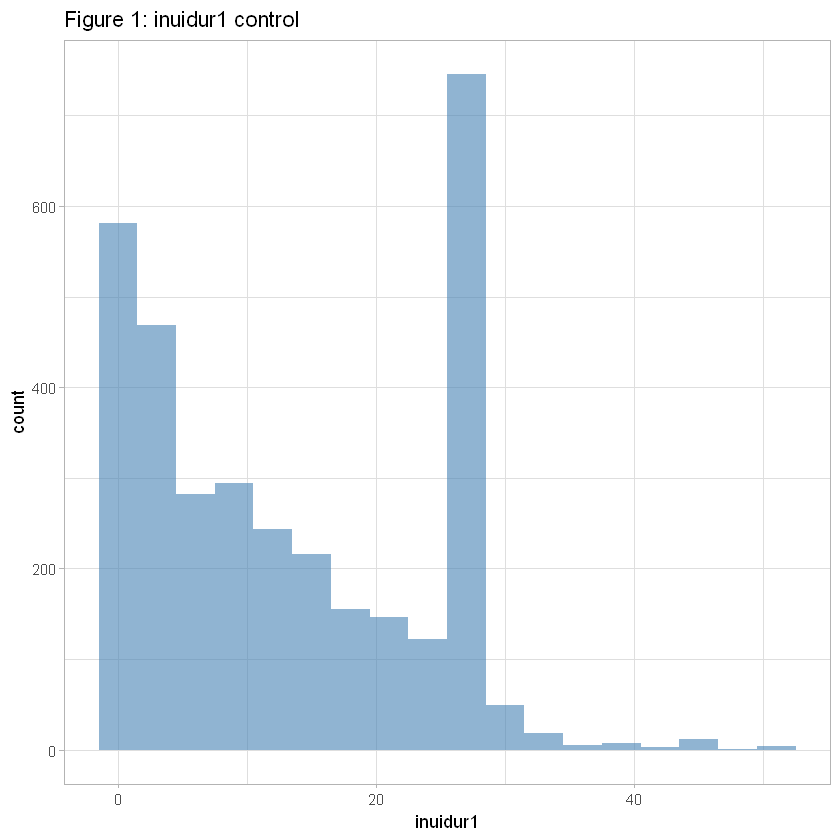

In [109]:
library(ggplot2)
controles <- ggplot(subset(Penn, tg==0), aes(inuidur1))  +
geom_histogram( binwidth = 3, fill = "steelblue", alpha = 0.6) +
ggtitle("Figure 1: inuidur1 control") +  
theme_light()
print(controles)    



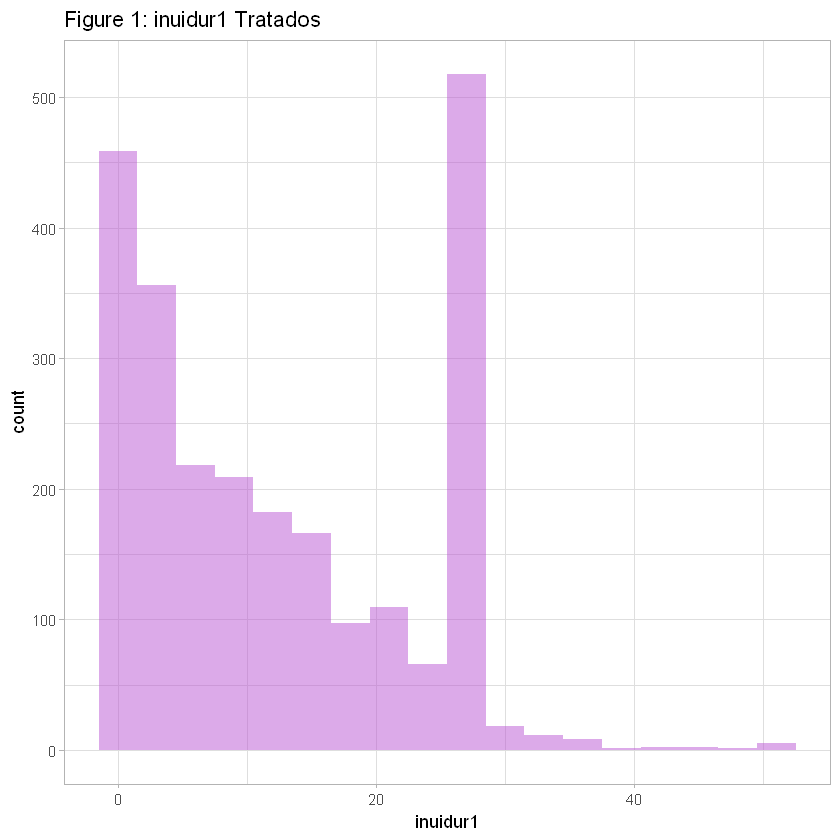

In [110]:
tratados <- ggplot(subset(Penn, tg==2), aes(inuidur1))  +
geom_histogram( binwidth = 3, fill = "MediumOrchid", alpha = 0.5) +
ggtitle("Figure 1: inuidur1 Tratados") +  
theme_light()
print(tratados)  

### Model 
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

### Analysis

We consider 

*  classical 2-sample approach, no adjustment (CL)
*  classical linear regression adjustment (CRA)
*  interactive regression adjusment (IRA)

and carry out robust inference using the *estimatr* R packages. 

In [111]:
library(lmtest)
library(sandwich)

In [112]:
# Variable T2  is random
m <- lm(T2~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)

coeftest(m, vcov = vcovHC(m, type="HC1"))


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           0.5171342  0.1568823  3.2963 0.0009856 ***
female                0.0056240  0.1324597  0.0425 0.9661352    
black                -0.0307771  0.0847262 -0.3633 0.7164293    
othrace              -0.4278818  0.3005502 -1.4237 0.1545993    
factor(dep)1          0.1576567  0.1851798  0.8514 0.3945992    
factor(dep)2         -0.1927958  0.1508926 -1.2777 0.2014067    
q2                   -0.1092161  0.1583768 -0.6896 0.4904762    
q3                   -0.1075663  0.1579864 -0.6809 0.4959890    
q4                   -0.0621302  0.1581168 -0.3929 0.6943797    
q5                   -0.0498684  0.1575034 -0.3166 0.7515450    
q6                   -0.2176336  0.1558290 -1.3966 0.1625831    
agelt35              -0.0643464  0.1326376 -0.4851 0.6276032    
agegt54               0.0259251  0.2395371  0.1082 0.9138171    
durable              -0.1256397  0.1763853 -0.7123 0.4763064    

In [113]:
# get same dataframe

X <- as.data.frame( model.matrix(m) )

no_col <- attributes(m$coefficients)$names[is.na(m$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

save( X1, file = "../../../data/m_reg.RData")

### Model specifications
##### 1.1 No adjustment

In [114]:
# no adjustment (2-sample approach)
formula_cl <- log(inuidur1)~T2

# Omitted dummies: q1, nondurable, muld
ols.cl_reg <- lm(formula_cl)

ols.cl = coeftest(ols.cl_reg, vcov = vcovHC(ols.cl_reg, type="HC1"))
print(ols.cl)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.056830   0.020954 98.1580  < 2e-16 ***
T2TRUE      -0.078825   0.032509 -2.4247  0.01535 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



##### 1.2 Classical linear regression adjustmen

In [115]:
# adding controls
formula_cra <- log(inuidur1)~T2+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2
# Omitted dummies: q1, nondurable, muld
ols.cra_reg <- lm(formula_cra)
ols.cra = coeftest(ols.cra_reg, vcov = vcovHC(ols.cra_reg, type="HC1"))
print(ols.cra)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           2.4471832  0.3580899  6.8340 9.123e-12 ***
T2TRUE               -0.0712066  0.0320440 -2.2222 0.0263124 *  
female               -0.9428048  0.2827961 -3.3339 0.0008620 ***
black                -0.6654258  0.2430567 -2.7377 0.0062056 ** 
othrace              -1.5494550  0.7312071 -2.1190 0.0341306 *  
factor(dep)1          0.2798498  0.3783316  0.7397 0.4595160    
factor(dep)2          0.1678164  0.3678718  0.4562 0.6482768    
q2                    0.0271228  0.3606226  0.0752 0.9400495    
q3                   -0.3542370  0.3601780 -0.9835 0.3254005    
q4                   -0.3380244  0.3606994 -0.9371 0.3487284    
q5                   -0.1777168  0.3598757 -0.4938 0.6214465    
q6                   -0.4456044  0.3612792 -1.2334 0.2174749    
agelt35              -0.3264815  0.3108711 -1.0502 0.2936639    
agegt54              -0.1551504  0.4796700 -0.3235 0.7463646    

In [116]:
# interactive regression model variables 
X <- model.matrix(~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)[,-1] #without intercept

The interactive specificaiton corresponds to the approach introduced in Lin (2013).

##### 1.3 Interactive regression adjustment (IRA)

In [117]:
#interactive regression model

demean<- function(x){ x - mean(x)}
X = apply(X, 2, demean)

ols.ira_reg = lm(log(inuidur1) ~ T2*X) 
ols.ira= coeftest(ols.ira_reg, vcov = vcovHC(ols.ira_reg, type="HC1"))
print(ols.ira)


t test of coefficients:

                               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                   2.0556976  0.0207138 99.2430 < 2.2e-16 ***
T2TRUE                       -0.0699044  0.0320764 -2.1793 0.0293503 *  
Xfemale                      -0.6662823  0.4080234 -1.6330 0.1025357    
Xblack                       -0.8634862  0.2969435 -2.9079 0.0036528 ** 
Xothrace                     -3.8176881  0.9366193 -4.0760 4.645e-05 ***
Xfactor(dep)1                 0.0359264  0.6476816  0.0555 0.9557666    
Xfactor(dep)2                 0.2117556  0.4512231  0.4693 0.6388790    
Xq2                          -0.2546436  0.4553391 -0.5592 0.5760207    
Xq3                          -0.6212326  0.4549639 -1.3655 0.1721653    
Xq4                          -0.4799269  0.4561206 -1.0522 0.2927566    
Xq5                          -0.3718675  0.4538882 -0.8193 0.4126542    
Xq6                          -0.6770474  0.4521499 -1.4974 0.1343469    
Xagelt35                 

In [125]:
ols_ira.female <- ols.ira["T2TRUE:Xfemale",1]
CI1upper <-confint(ols.ira)["T2TRUE:Xfemale",2]
CI1low <-confint(ols.ira)["T2TRUE:Xfemale",1]

ols_ira.black <- ols.ira["T2TRUE:Xblack",1]
CI2upper <-confint(ols.ira)["T2TRUE:Xblack",2]
CI2low <-confint(ols.ira)["T2TRUE:Xblack",1]

ols_ira.age <- ols.ira["T2TRUE:Xagelt35",1]
CI3upper <-confint(ols.ira)["T2TRUE:Xagelt35",2]
CI3low <-confint(ols.ira)["T2TRUE:Xagelt35",1]

ols_ira.dep1 <- ols.ira["T2TRUE:Xfactor(dep)1",1]
CI4upper <-confint(ols.ira)["T2TRUE:Xfactor(dep)1",2]
CI4low <-confint(ols.ira)["T2TRUE:Xfactor(dep)1",1]

##### 1.4 Interactive regression adjustment (IRA) using Lasso

In [118]:
T2 = demean(T2)
DX = model.matrix(~T2*X)[,-1]
head(DX)

T2         Xfemale    Xblack    Xothrace     Xfactor(dep)1 Xfactor(dep)2
1 -0.4199239 -0.4007264 -0.118817 -0.005188516 -0.1165687     0.839329    
2  0.5800761 -0.4007264 -0.118817 -0.005188516 -0.1165687    -0.160671    
3 -0.4199239 -0.4007264 -0.118817 -0.005188516 -0.1165687    -0.160671    
4 -0.4199239 -0.4007264 -0.118817 -0.005188516 -0.1165687    -0.160671    
5  0.5800761  0.5992736 -0.118817 -0.005188516 -0.1165687    -0.160671    
6 -0.4199239 -0.4007264 -0.118817 -0.005188516  0.8834313    -0.160671    
  Xq2        Xq3        Xq4        Xq5        ⋯ T2:Xagelt35:agegt54
1 -0.2001038 -0.2355586 -0.2232791  0.7367693 ⋯ 0                  
2 -0.2001038  0.7644414 -0.2232791 -0.2632307 ⋯ 0                  
3 -0.2001038 -0.2355586 -0.2232791  0.7367693 ⋯ 0                  
4 -0.2001038 -0.2355586  0.7767209 -0.2632307 ⋯ 0                  
5 -0.2001038 -0.2355586  0.7767209 -0.2632307 ⋯ 0                  
6 -0.2001038 -0.2355586 -0.2232791  0.7367693 ⋯ 0                  
  T2:Xagelt35:durable T2:Xagelt35:lusd T2:Xagelt35:husd T2:Xagegt54:durable
1  0.03086608          0.05563156       0.05120138       0.007916241       
2 -0.04263790          0.50322755      -0.07072875      -0.010935367       
3  0.03086608          0.05563156       0.05120138       0.007916241       
4  0.03086608          0.05563156       0.05120138       0.007916241       
5 -0.04263790         -0.07684855      -0.07072875      -0.010935367       
6  0.03086608          0.05563156       0.05120138      -0.412007661       
  T2:Xagegt54:lusd T2:Xagegt54:husd T2:Xdurable:lusd T2:Xdurable:husd
1  0.0136537        0.01162017       0.02309509       0.01220118     
2 -0.0188610       -0.01605192      -0.03190318      -0.01685451     
3  0.0136537        0.01162017       0.02309509       0.01220118     
4  0.0136537        0.01162017       0.02309509       0.01220118     
5 -0.0188610       -0.01605192      -0.03190318      -0.01685451     
6 -0.4062702        0.01162017      -0.39682881       0.01220118     
  T2:Xlusd:husd
1 0            
2 0            
3 0            
4 0            
5 0            
6 0

In [119]:
library(hdm)

rlasso.ira = summary(rlassoEffects(DX, log(inuidur1), index = 1))

# rlassoEffects ( Partialling out )
# index = 1 (T4 treatment )
print(rlasso.ira)

[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)  
T2  -0.07457    0.03209  -2.324   0.0201 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




In [122]:
# getting data
S = as.data.frame(DX)
save( S, file = "../../../data/rlasso_ira_reg.RData")

In [123]:
head(S)

T2         Xfemale    Xblack    Xothrace     Xfactor(dep)1 Xfactor(dep)2
1 -0.4199239 -0.4007264 -0.118817 -0.005188516 -0.1165687     0.839329    
2  0.5800761 -0.4007264 -0.118817 -0.005188516 -0.1165687    -0.160671    
3 -0.4199239 -0.4007264 -0.118817 -0.005188516 -0.1165687    -0.160671    
4 -0.4199239 -0.4007264 -0.118817 -0.005188516 -0.1165687    -0.160671    
5  0.5800761  0.5992736 -0.118817 -0.005188516 -0.1165687    -0.160671    
6 -0.4199239 -0.4007264 -0.118817 -0.005188516  0.8834313    -0.160671    
  Xq2        Xq3        Xq4        Xq5        ⋯ T2:Xagelt35:agegt54
1 -0.2001038 -0.2355586 -0.2232791  0.7367693 ⋯ 0                  
2 -0.2001038  0.7644414 -0.2232791 -0.2632307 ⋯ 0                  
3 -0.2001038 -0.2355586 -0.2232791  0.7367693 ⋯ 0                  
4 -0.2001038 -0.2355586  0.7767209 -0.2632307 ⋯ 0                  
5 -0.2001038 -0.2355586  0.7767209 -0.2632307 ⋯ 0                  
6 -0.2001038 -0.2355586 -0.2232791  0.7367693 ⋯ 0                  
  T2:Xagelt35:durable T2:Xagelt35:lusd T2:Xagelt35:husd T2:Xagegt54:durable
1  0.03086608          0.05563156       0.05120138       0.007916241       
2 -0.04263790          0.50322755      -0.07072875      -0.010935367       
3  0.03086608          0.05563156       0.05120138       0.007916241       
4  0.03086608          0.05563156       0.05120138       0.007916241       
5 -0.04263790         -0.07684855      -0.07072875      -0.010935367       
6  0.03086608          0.05563156       0.05120138      -0.412007661       
  T2:Xagegt54:lusd T2:Xagegt54:husd T2:Xdurable:lusd T2:Xdurable:husd
1  0.0136537        0.01162017       0.02309509       0.01220118     
2 -0.0188610       -0.01605192      -0.03190318      -0.01685451     
3  0.0136537        0.01162017       0.02309509       0.01220118     
4  0.0136537        0.01162017       0.02309509       0.01220118     
5 -0.0188610       -0.01605192      -0.03190318      -0.01685451     
6 -0.4062702        0.01162017      -0.39682881       0.01220118     
  T2:Xlusd:husd
1 0            
2 0            
3 0            
4 0            
5 0            
6 0

### Results

In [124]:
install.packages("xtable")
library(xtable)
table<- matrix(0, 2, 4)
table[1,1]<-  ols.cl[2,1]
table[1,2]<-  ols.cra[2,1]
table[1,3]<-  ols.ira[2,1]
table[1,4]<-  rlasso.ira[[1]][1]

table[2,1]<-  ols.cl[2,2]
table[2,2]<-  ols.cra[2,2]
table[2,3]<-  ols.ira[2,2]
table[2,4]<-  rlasso.ira[[1]][2]


colnames(table)<- c("CL","CRA","IRA", "IRA w Lasso")
rownames(table)<- c("estimate", "standard error")
tab<- xtable(table, digits=5)
tab

print(tab, type="latex", digits=5)

Installing package into 'C:/Users/vn.hoyosm/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'xtable' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vn.hoyosm\AppData\Local\Temp\RtmpUjYkGH\downloaded_packages


CL          CRA         IRA         IRA w Lasso
estimate       -0.07882533 -0.07120664 -0.06990440 -0.07457328
standard error  0.03250889  0.03204403  0.03207638  0.03208892

% latex table generated in R 4.3.3 by xtable 1.8-4 package
% Tue Apr 23 20:18:03 2024
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & CL & CRA & IRA & IRA w Lasso \\ 
  \hline
estimate & -0.07883 & -0.07121 & -0.06990 & -0.07457 \\ 
  standard error & 0.03251 & 0.03204 & 0.03208 & 0.03209 \\ 
   \hline
\end{tabular}
\end{table}


* #### **Using the 3. interactive regression adjustment (IRA) plot the coefficients of the next variables**

In [127]:
CIdf <- data.frame(x = c('T2*female','T2*black','T2*agelt35','T2*factor(dep)1'),
                         y = c(ols_ira.female, ols_ira.black,ols_ira.age, ols_ira.dep1),
                         lower = c(CI1low,CI2low,CI3low,CI4low),
                         upper = c(CI1upper,CI2upper,CI3upper,CI4upper))

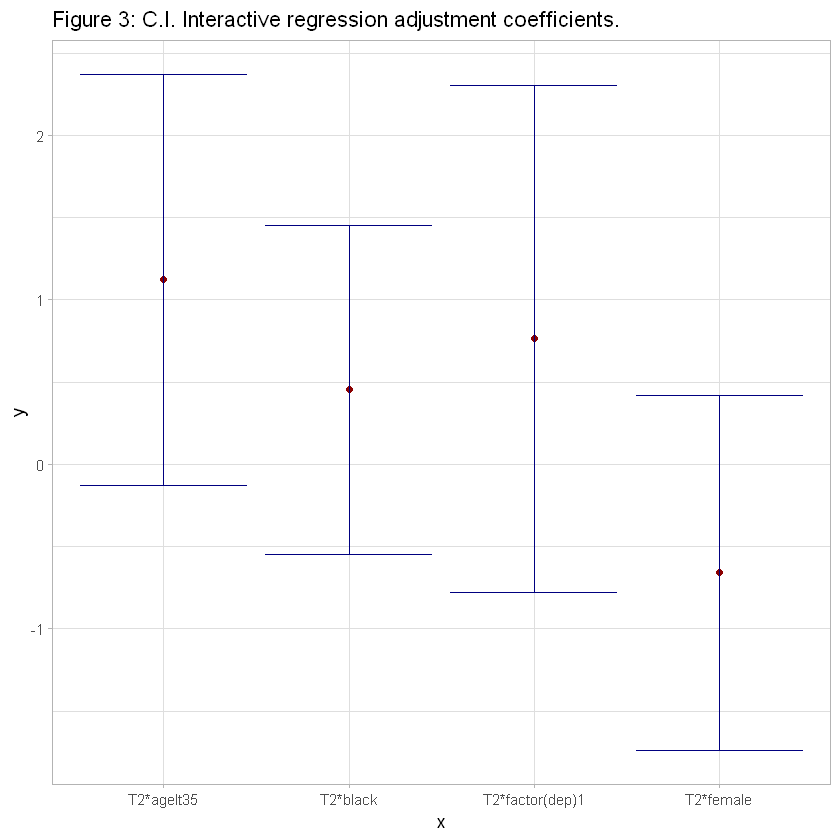

In [129]:
ggplot(CIdf, aes(x, y)) +
  geom_point(color = "darkred") +  
  geom_errorbar(aes(ymin = lower, ymax = upper), color = "navyblue") +  
  ggtitle("Figure 3: C.I. Interactive regression adjustment coefficients.") +
  theme_light()
     